In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Figure settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

### Helper Functions

In [13]:
# @title Helper functions

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere


def plot_all(t_range, v, raster=None, spikes=None, spikes_mean=None):
  """
  Plots Time evolution for
  (1) multiple realizations of membrane potential
  (2) spikes
  (3) mean spike rate (optional)

  Args:
    t_range (numpy array of floats)
        range of time steps for the plots of shape (time steps)

    v (numpy array of floats)
        membrane potential values of shape (neurons, time steps)

    raster (numpy array of floats)
        spike raster of shape (neurons, time steps)

    spikes (dictionary of lists)
        list with spike times indexed by neuron number

    spikes_mean (numpy array of floats)
        Mean spike rate for spikes as dictionary

  Returns:
    Nothing.
  """

  v_mean = np.mean(v, axis=0)
  fig_w, fig_h = plt.rcParams['figure.figsize']
  plt.figure(figsize=(fig_w, 1.5 * fig_h))

  ax1 = plt.subplot(3, 1, 1)
  for j in range(n):
    plt.scatter(t_range, v[j], color="k", marker=".", alpha=0.01)
  plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
  plt.xticks([])
  plt.ylabel(r'$V_m$ (V)')

  if raster is not None:
    plt.subplot(3, 1, 2)
    spikes_mean = np.mean(raster, axis=0)
    plt.imshow(raster, cmap='Greys', origin='lower', aspect='auto')

  else:
    plt.subplot(3, 1, 2, sharex=ax1)
    for j in range(n):
      times = np.array(spikes[j])
      plt.scatter(times, j * np.ones_like(times), color="C0", marker=".", alpha=0.2)

  plt.xticks([])
  plt.ylabel('neuron')

  if spikes_mean is not None:
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.plot(t_range, spikes_mean)
    plt.xlabel('time (s)')
    plt.ylabel('rate (Hz)')

  plt.tight_layout()
  plt.show()

## Part I

### the LIF Model

A membrane equation with a reset condition.

\begin{align*}
\tau_m\,\frac{d}{dt}\,V(t) &= E_L - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\ \\
V(t) &= V_{reset} &\text{otherwise}
\end{align*}


#### Ex1 Parameters

In [3]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


### Discrete Time Integration

#### Ex2 + Ex3 Pretty Print

In [4]:
# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin(2 * np.pi * 100 * t))

  # Print value of i
  print(f'{t:.3f} {i:.4e}')

0.000 2.5000e-10
0.001 3.9695e-10
0.002 4.8776e-10
0.003 4.8776e-10
0.004 3.9695e-10
0.005 2.5000e-10
0.006 1.0305e-10
0.007 1.2236e-11
0.008 1.2236e-11
0.009 1.0305e-10


#### Ex4 Membrane Potential

In [5]:
#################################################
## out compute v code ##
#################################################

# Initialize step_end and v0
step_end = 10
v = el

# Loop for step_end steps
for step in range(step_end):
  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + (dt / tau) * (el - v + r * i)

  # Print value of t and v
  print(f"{t:.3f} {v:.4e}")

0.000 -5.8750e-02
0.001 -5.6828e-02
0.002 -5.4548e-02
0.003 -5.2381e-02
0.004 -5.0778e-02
0.005 -4.9989e-02
0.006 -4.9974e-02
0.007 -5.0414e-02
0.008 -5.0832e-02
0.009 -5.0775e-02


### Plotting

#### Ex5 Current

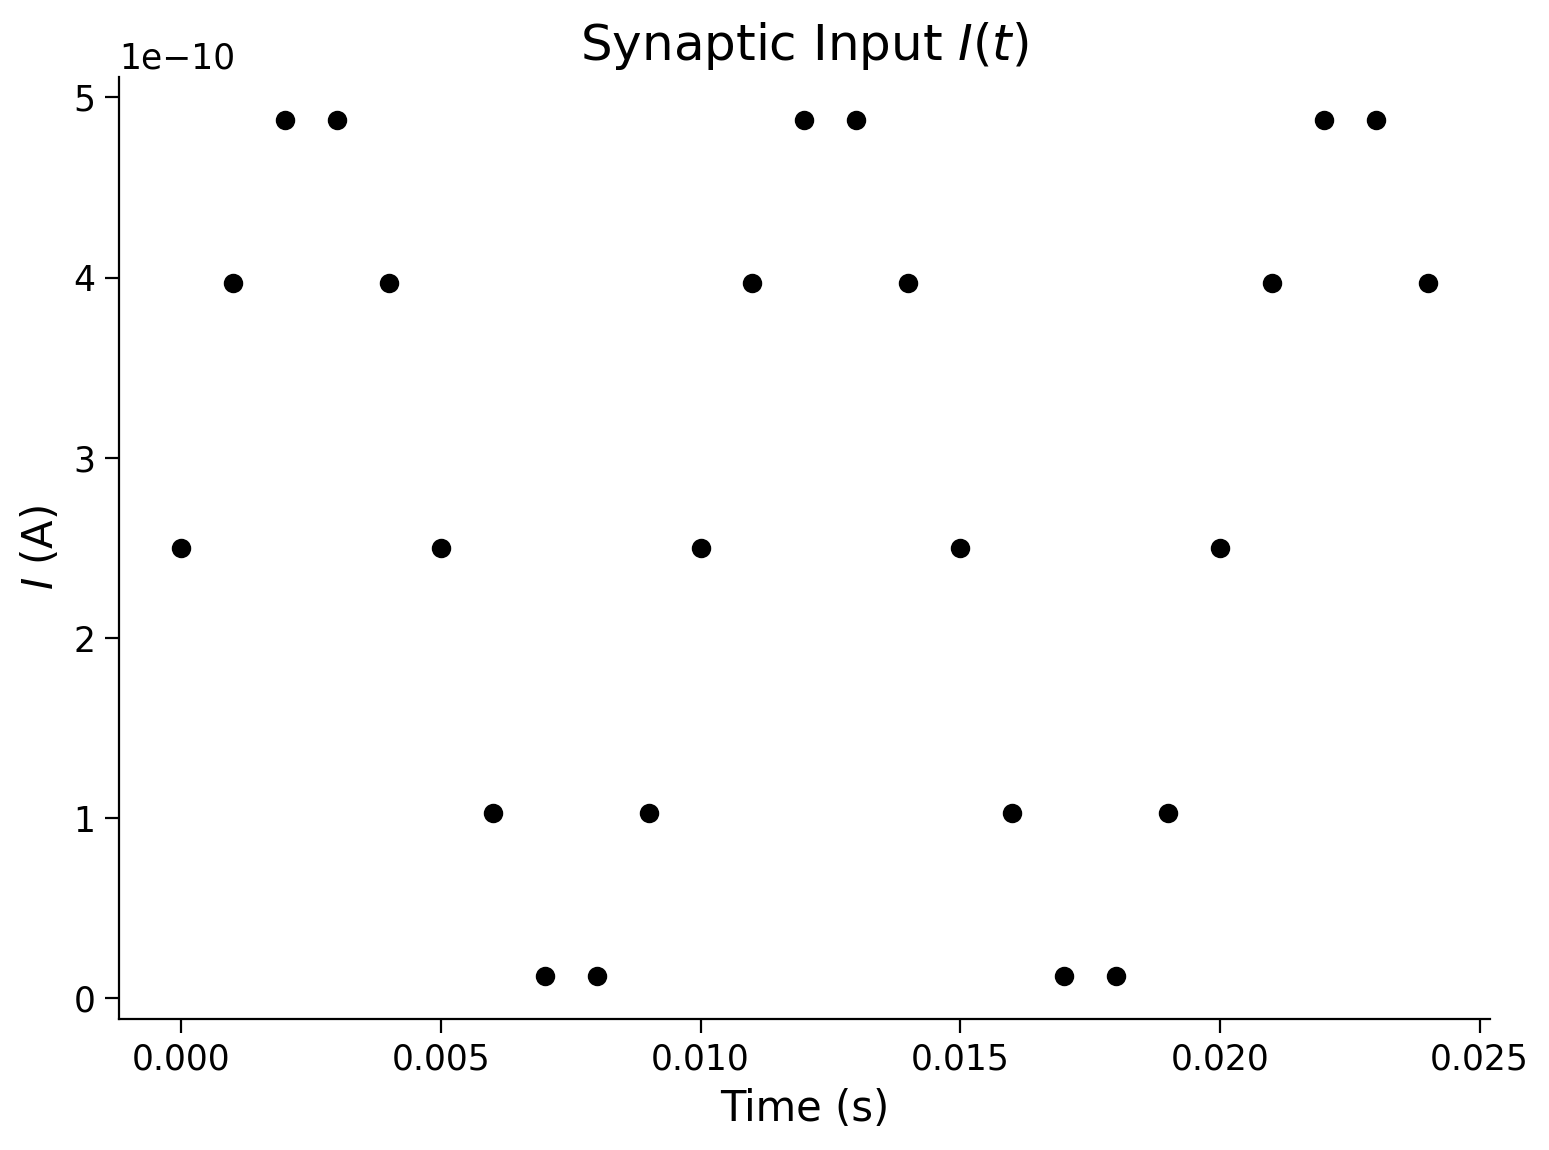

In [6]:
#################################################
# fill out the figure initialization and plotting code below ##
#################################################

# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title("Synaptic Input $I(t)$")
plt.xlabel("Time (s)")
plt.ylabel("$I$ (A)")

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i, 'ko')

# Display the plot
plt.show()

#### Ex6 Membrane Potential

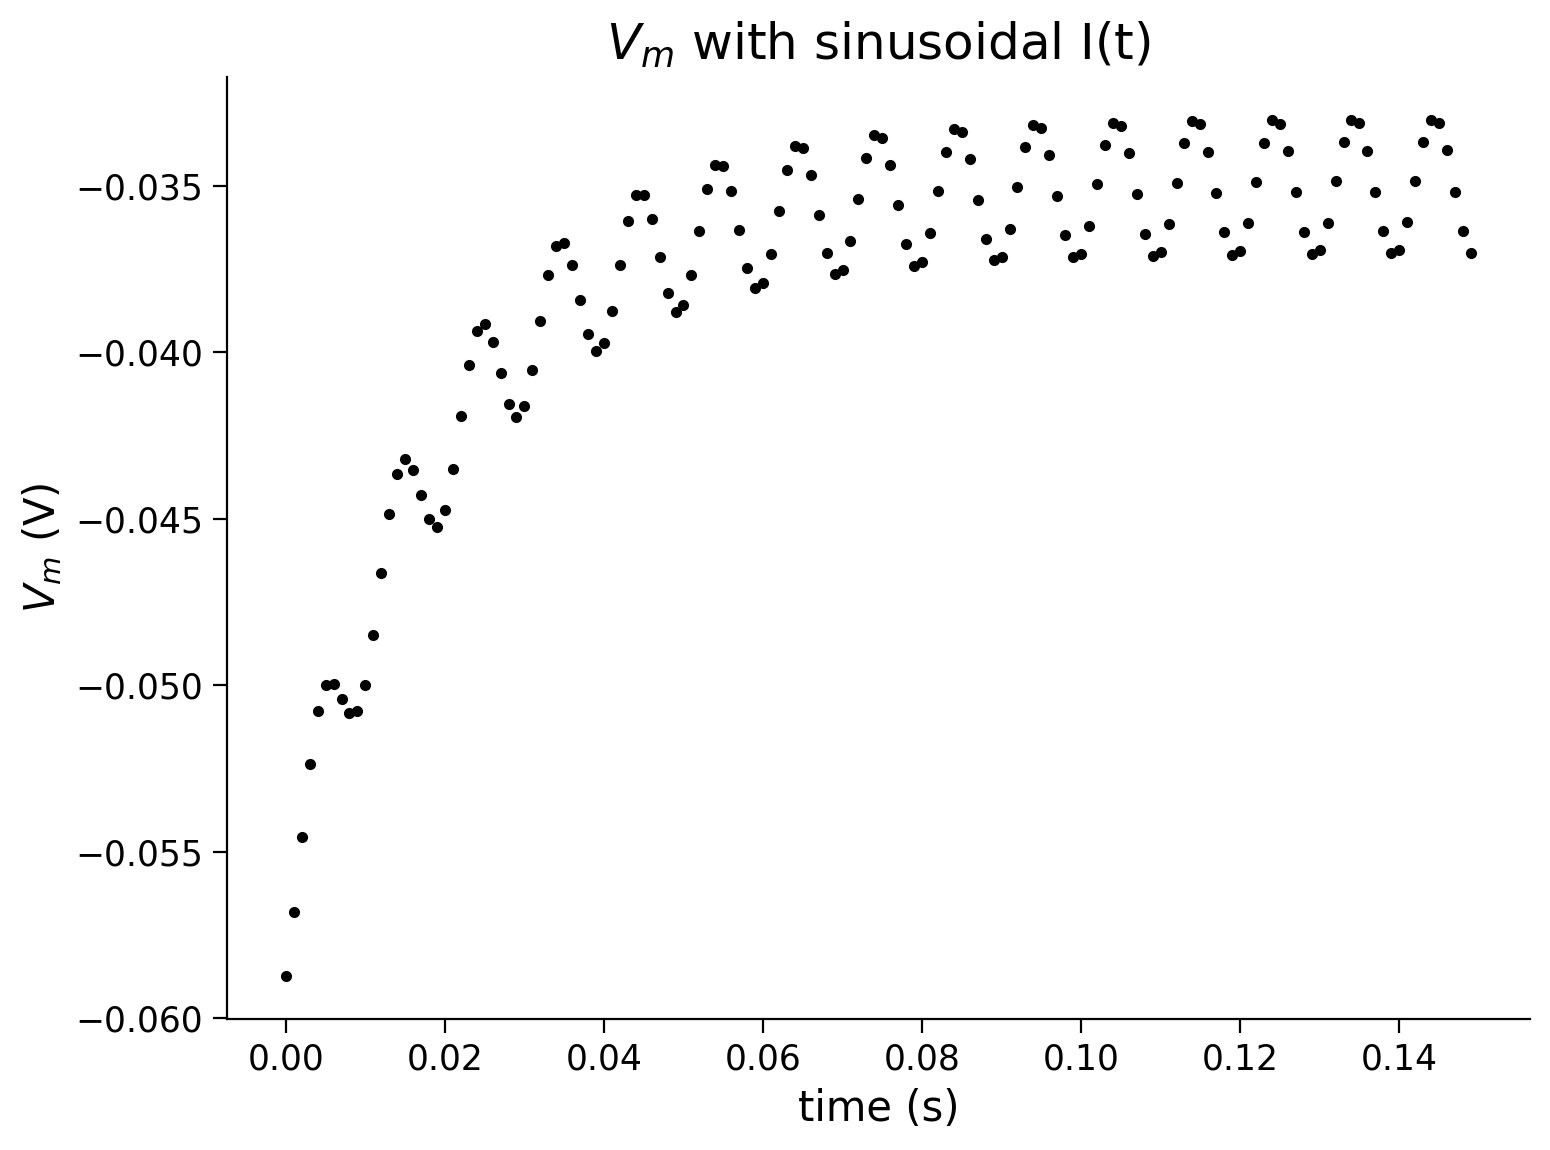

In [7]:
#################################################
## fill out the figure initialization and plotting code below ##
#################################################

# Initialize step_end
step_end = int(t_max / dt)

# Initialize v0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')

# Display plot
plt.show()

### Random Synaptic Input

\begin{equation*}
I(t) = I_{mean}\left(1 + 0.1\,\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim \mathcal{U}(-1, 1)
\end{equation*}

#### Ex7 Randomness

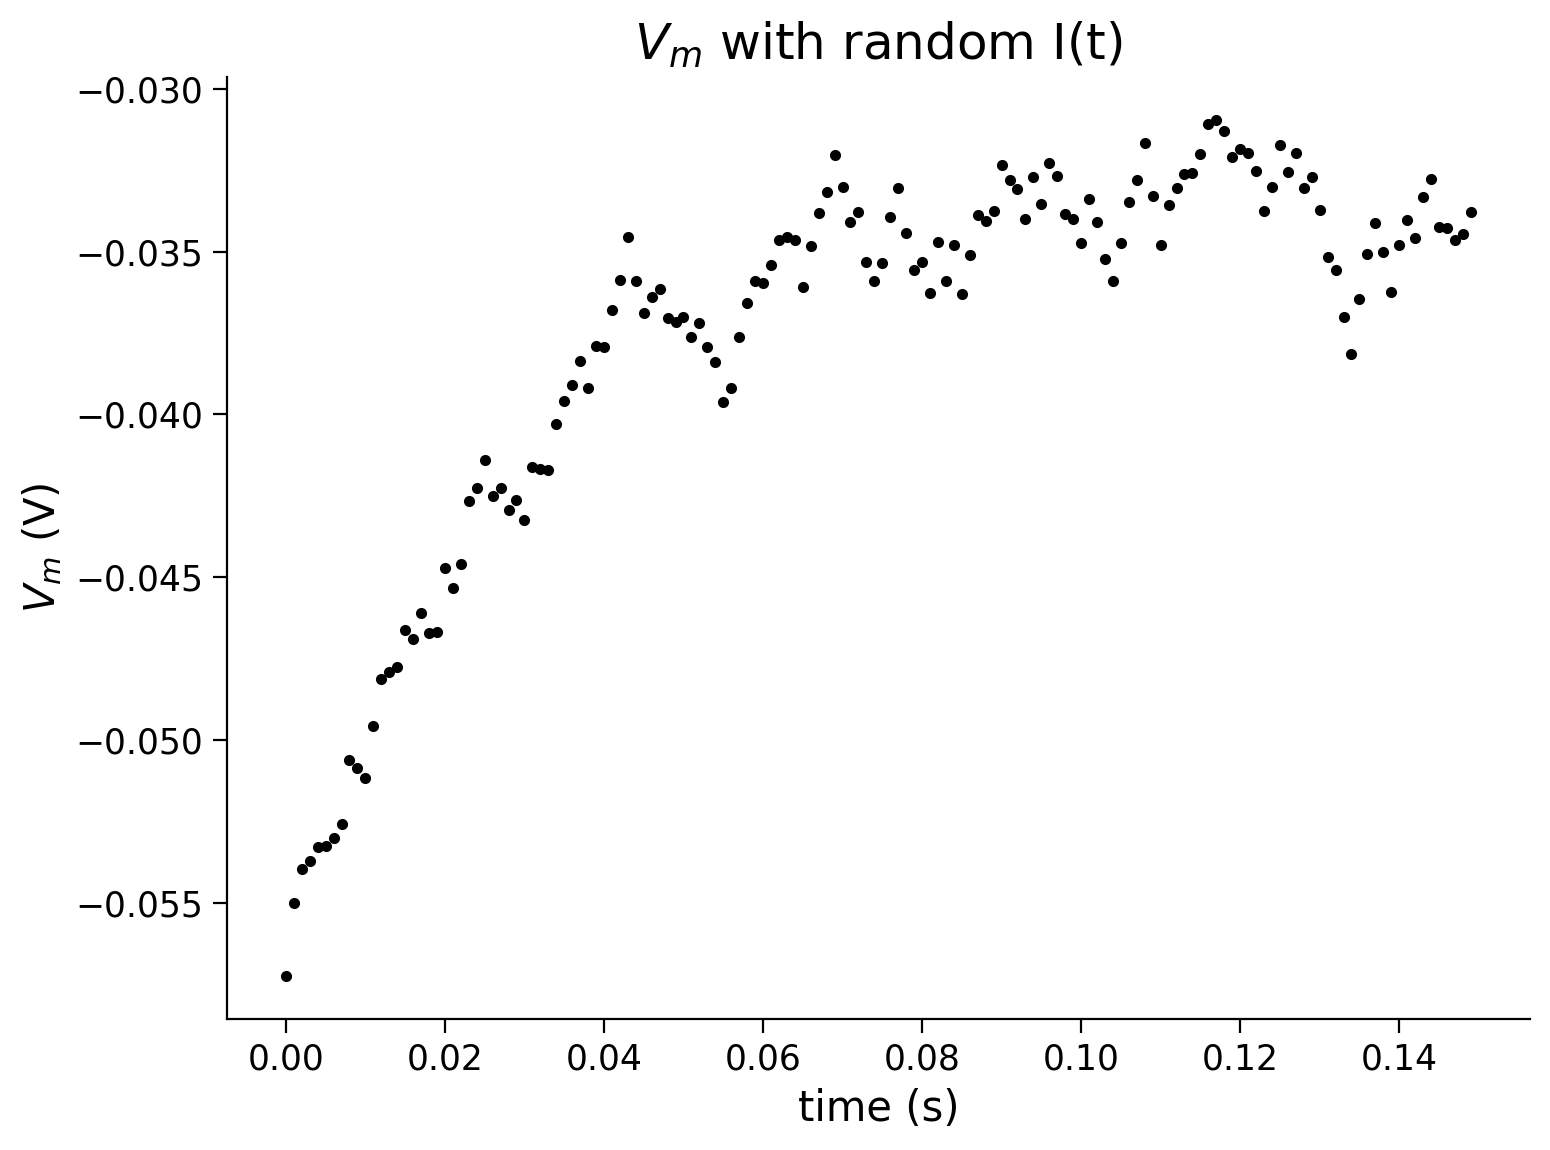

In [8]:
#################################################
## fill out code to get random input ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max / dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Get random number in correct range of -1 to 1 (will need to adjust output of np.random.random)
  random_num = np.random.random() * 2 - 1

  # Compute value of i at this time step
  i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * random_num)

  # Compute v
  v = v + dt/tau * (el - v + r*i)

  # Plot v (using 'k.' to get even smaller markers)
  plt.plot(t, v, 'k.')


# Display plot
plt.show()

### Ensemble Stat

\begin{align*}
\\
\left\langle V(t)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V_n(t) & & \text{sample mean} \\
\left\langle (V(t) - \langle V(t)\rangle)^2\right\rangle &= \frac{1}{N-1}\sum_{n=1}^N (V_n(t) - \langle V(t)\rangle)^2 & & \text{sample variance} \\
\left\langle(V(t) - \langle V(t)\rangle) (V(s) - \langle V(s)\rangle)\right\rangle &= \frac{1}{N-1}\sum_{n=1}^N (V_n(t) - \langle V(t)\rangle) (V_n(s) - \langle V(s)\rangle) & & \text{sample autocovariance}
\end{align*}

#### Ex8 Simulation + Ex9 Sample Mean + Ex10 Sample Std Dev

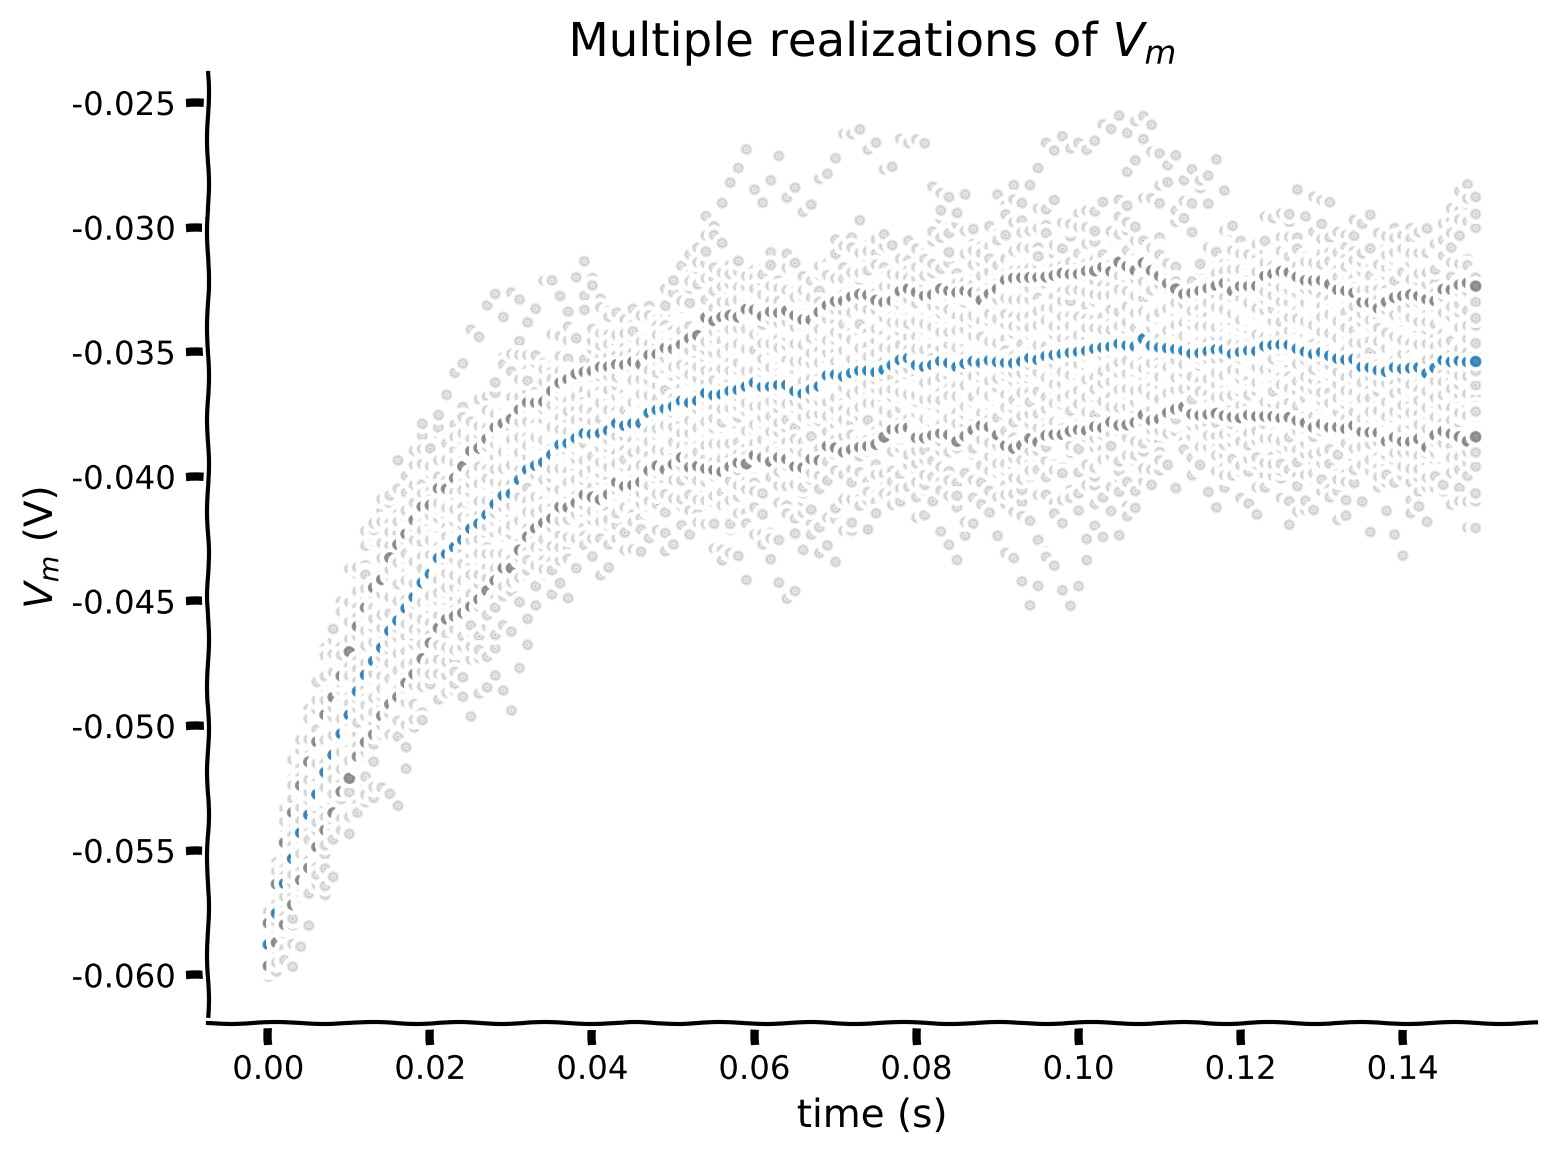

In [9]:
#################################################
## fill out code to store v in list ##
## fill out code to plot sample mean ##
## fill out code to plot sample standard deviation ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max / dt)
n = 50

# Intiatialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n

with plt.xkcd():
  # Initialize the figure
  plt.figure()
  plt.title('Multiple realizations of $V_m$')
  plt.xlabel('time (s)')
  plt.ylabel('$V_m$ (V)')

  # Loop for step_end steps
  for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0, n):

      # Compute value of i at this time step
      i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))

      # Compute value of v for this simulation
      v_n[j] = v_n[j] + dt/tau * (el - v_n[j] + r*i)

    # Compute sample mean by summing list of v_n using sum, and dividing by n
    v_mean = sum(v_n) / n

    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v_n[i] - v_mean)**2 for i in range(n)]

    # Compute sample variance
    v_var = sum(v_var_n) / (n - 1)

    # Compute std dev
    v_std = np.sqrt(v_var)


    # Plot all simulations (use alpha = 0.1 to make each marker slightly transparent)
    plt.plot([t] * n, v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8)

    # Plot mean +- std dev with alpha 0.8 and argument 'C7.'
    plt.plot(t, v_mean + v_std, 'C7.', alpha=0.8)
    plt.plot(t, v_mean - v_std, 'C7.', alpha=0.8)

  # Display plot
  plt.show()

### Numpy

#### Ex11 Numpy Rewrite

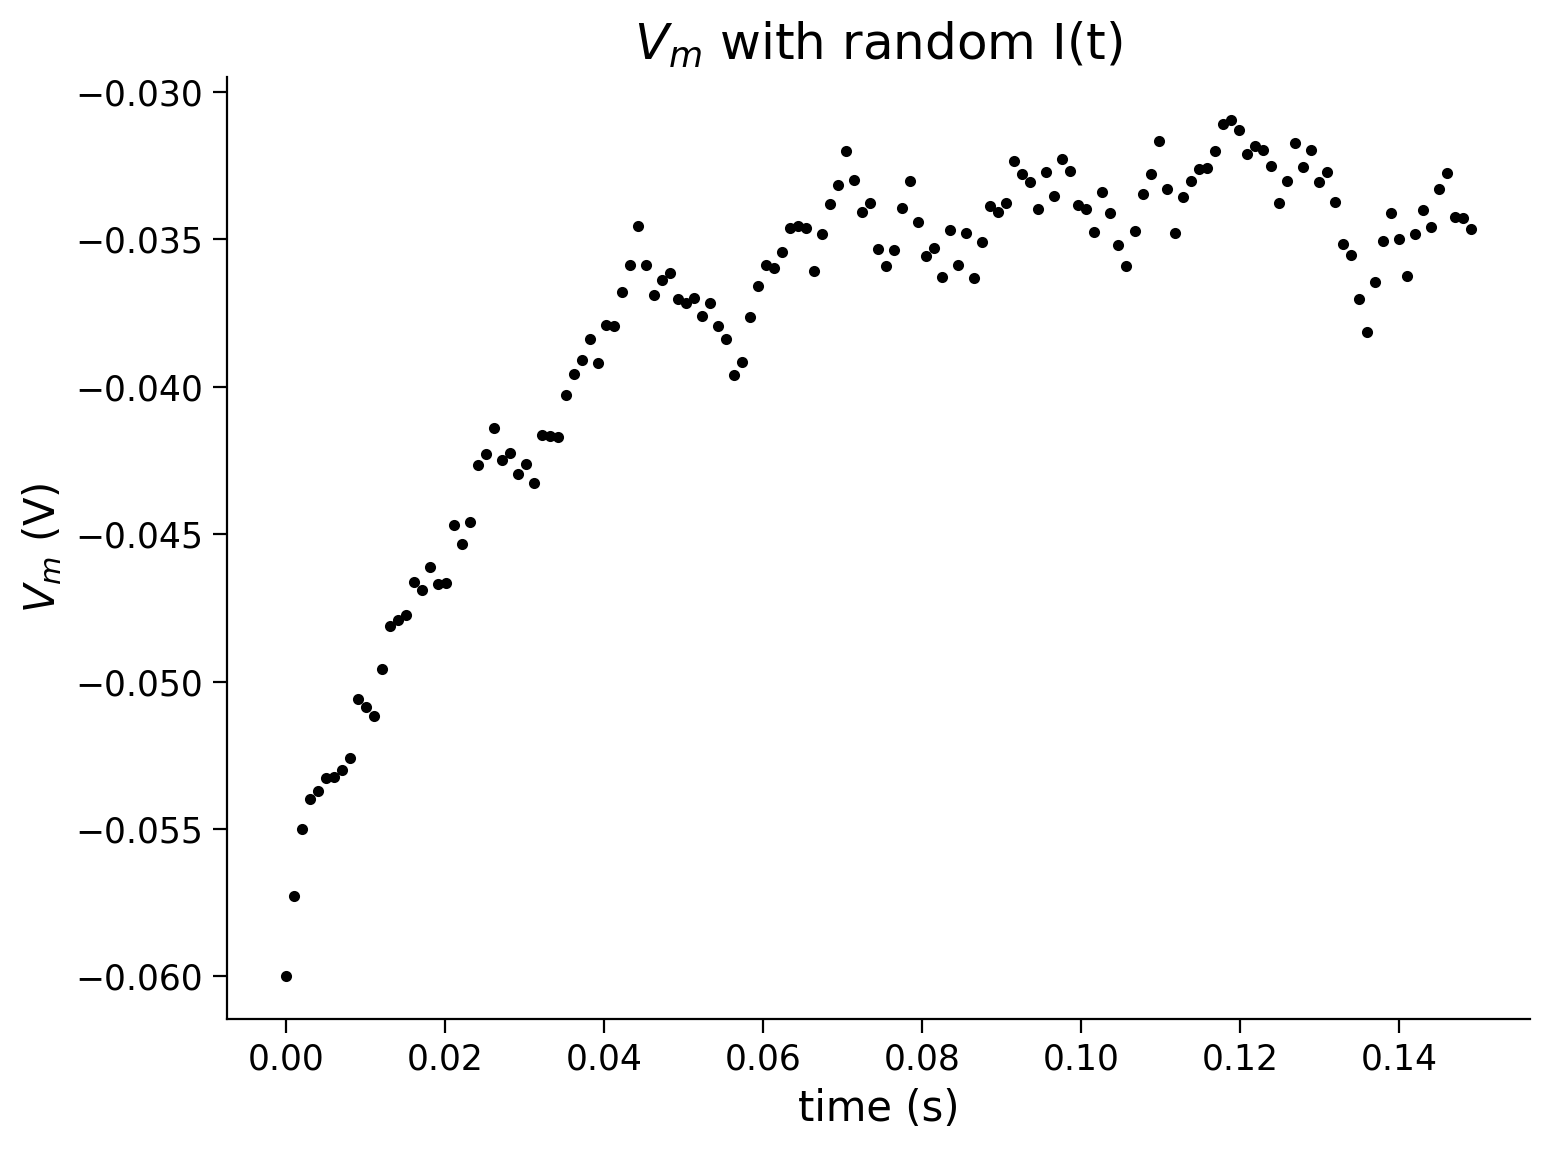

In [10]:
#################################################
## fill out code to rewrite simulation in numpy##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random(step_end) - 1))

# Loop for step_end steps
for step in range(1, step_end):

  # Compute v as function of i
  v[step] = v[step - 1] + dt / tau * (el - v[step - 1] + r * i[step - 1])


# Plot membrane potential
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

#### Ex12 Enumerate

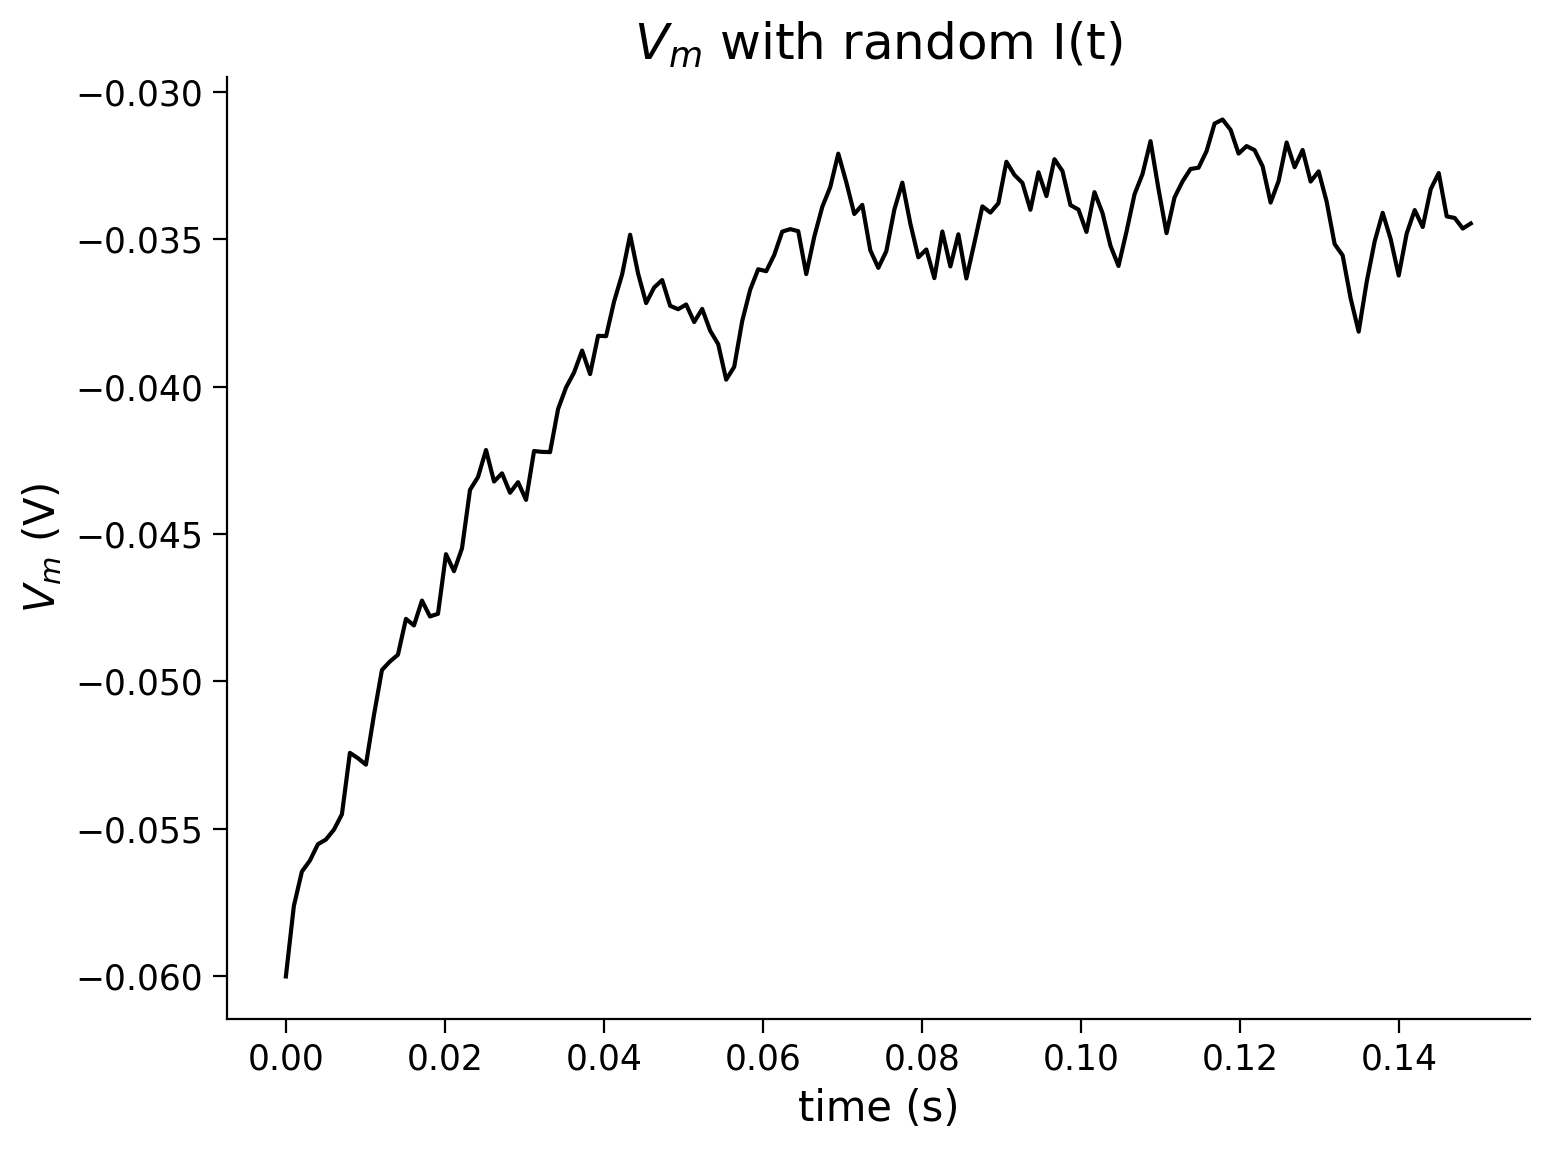

In [11]:
#################################################
## fill out code to rewrite simulation in numpy##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) - 1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

  # Skip first iteration
  if step==0:
    continue

  # Compute v as function of i using i_step
  v[step] = v[step - 1] + dt / tau * (el - v[step - 1] + r * i_step)

# Plot figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

#### Ex13 2D Arrays + Ex14 Mean & Std. Dev.

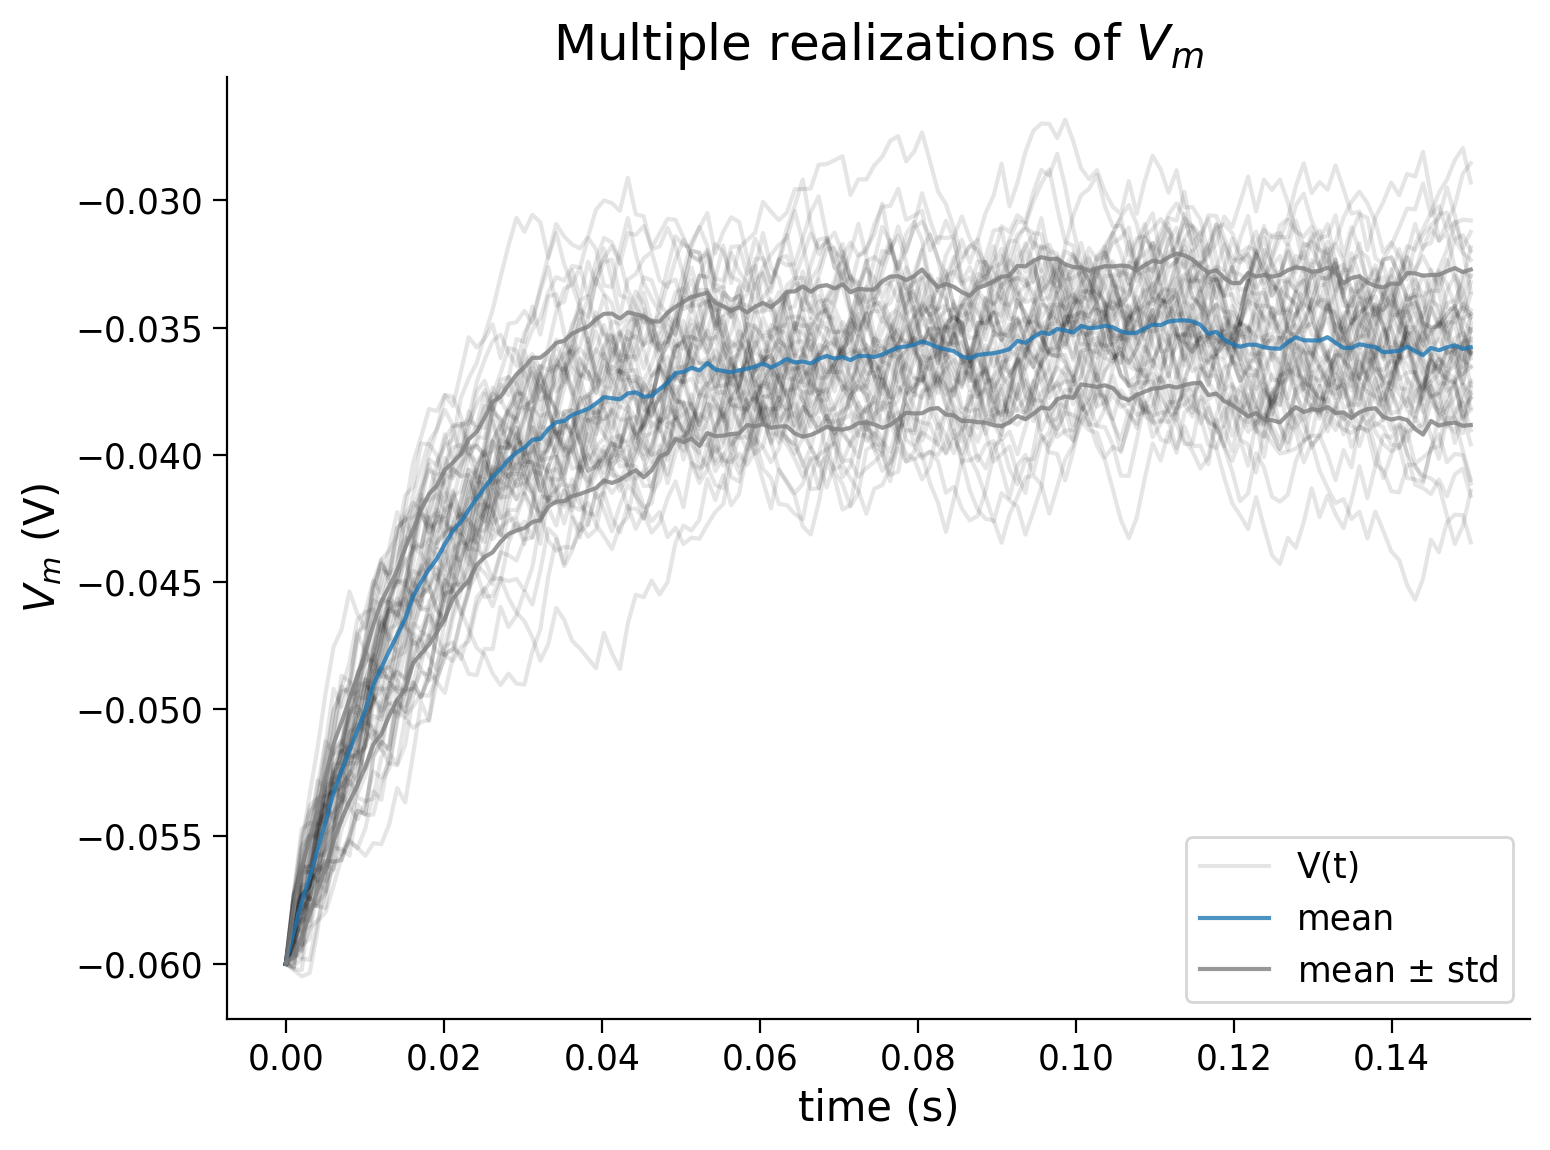

In [12]:
#################################################
## fill out code to use 2d arrays ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, n, t_range, v and i
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * (2 * np.random.random([n, step_end]) - 1))

# Loop for step_end - 1 steps
for step in range(1, step_end):

   # Compute v_n
   v_n[:, step] = v_n[:, step - 1] + dt / tau * (el - v_n[:, step - 1] + r * i[:, step - 1])


# Compute sample mean (use np.mean)
v_mean = np.mean(v_n, axis=0)

# Compute sample standard deviation (use np.std)
v_std = np.std(v_n, axis=0)

# Plot figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v_n.T, 'k', alpha=0.1)

plt.plot(t_range, v_n[-1], 'k', alpha=0.1, label='V(t)')
plt.plot(t_range, v_mean, 'C0', alpha=0.8, label='mean')
plt.plot(t_range, v_mean+v_std, 'C7', alpha=0.8)
plt.plot(t_range, v_mean-v_std, 'C7', alpha=0.8, label='mean $\\pm$ std')

plt.legend()
plt.show()

## Part II

### Histograms

#### Ex1 Histogram

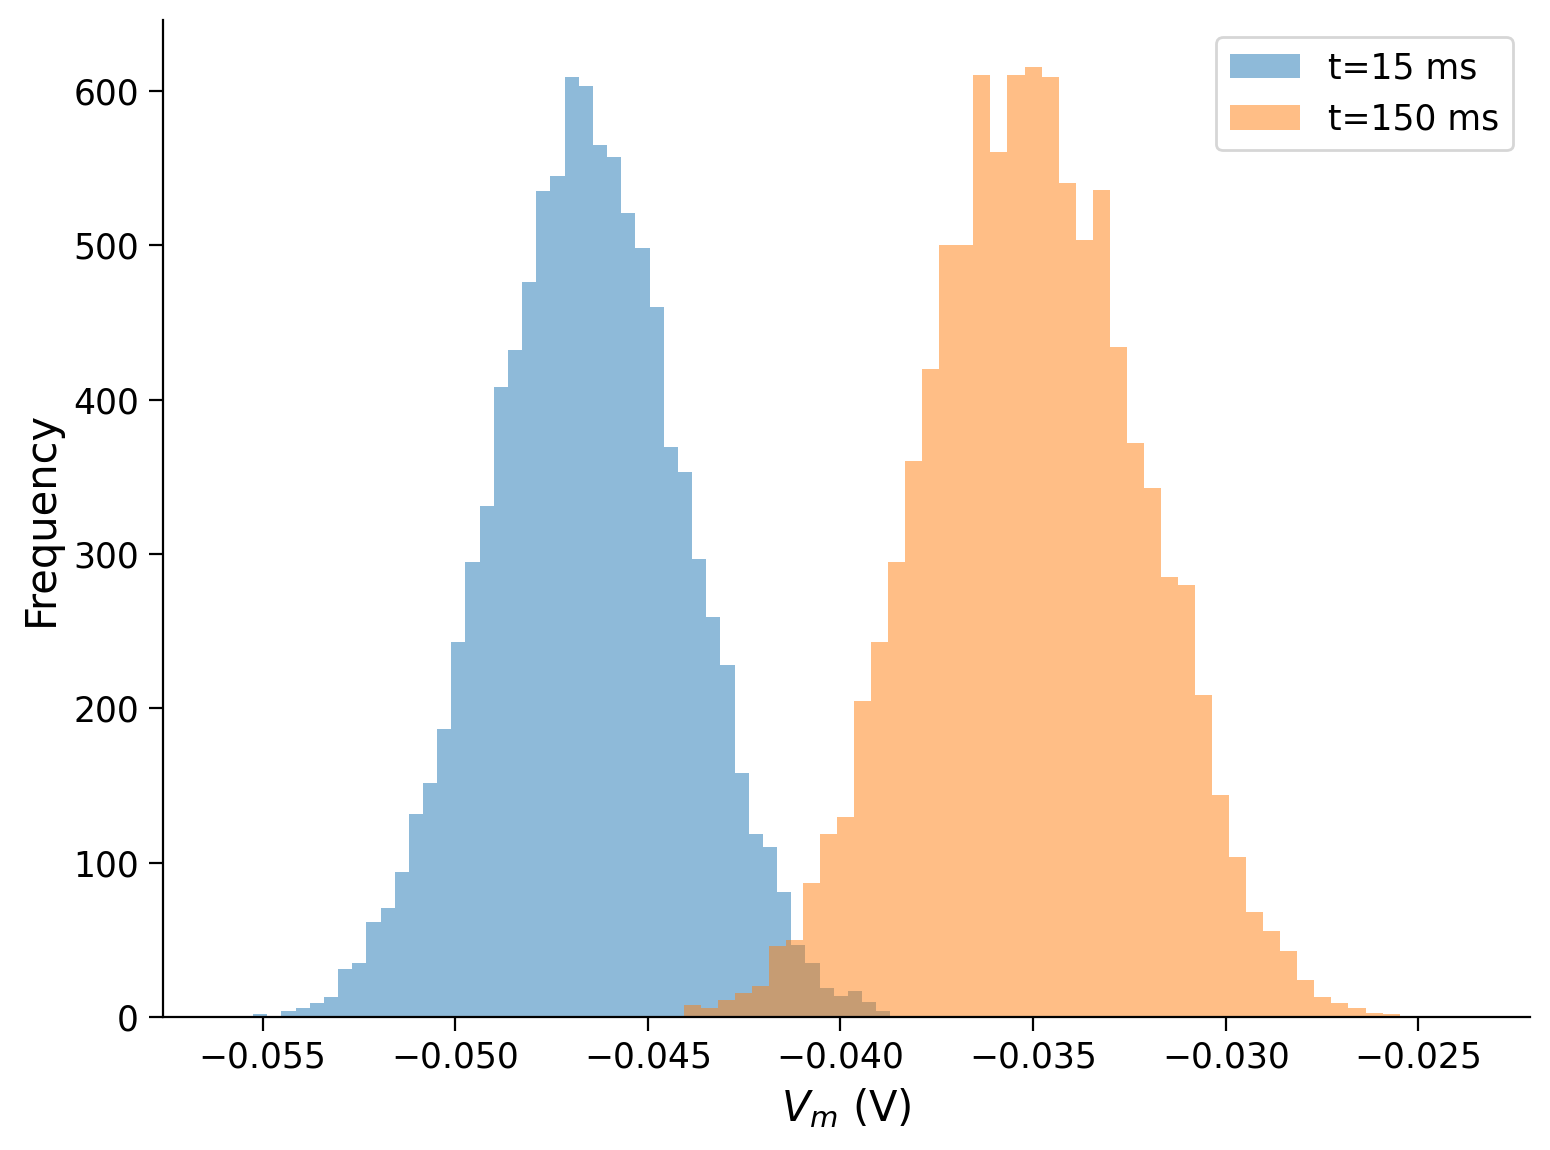

In [14]:
#################################################
## fill out code to plot histogram ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize t_range, step_end, n, v_n, i and nbins
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 10000
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))
nbins = 50

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:, step] =  v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

# Initialize the figure
plt.figure()
plt.ylabel('Frequency')
plt.xlabel('$V_m$ (V)')

# Plot a histogram at t_max/10 (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:, int(step_end/10)], bins=nbins, histtype='stepfilled', linewidth=0, alpha=0.5, label=f't={t_max/10*1e3:.0f} ms')

# Plot a histogram at t_max (add labels and parameters histtype='stepfilled' and linewidth=0)
plt.hist(v_n[:, -1], bins=nbins, histtype='stepfilled', linewidth=0, alpha=0.5, label=f't={t_max*1e3:.0f} ms')

# Add legend
plt.legend()
plt.show()

### Spikes

#### Ex2 + Ex3 + Ex4 Spike to a LIF neuron

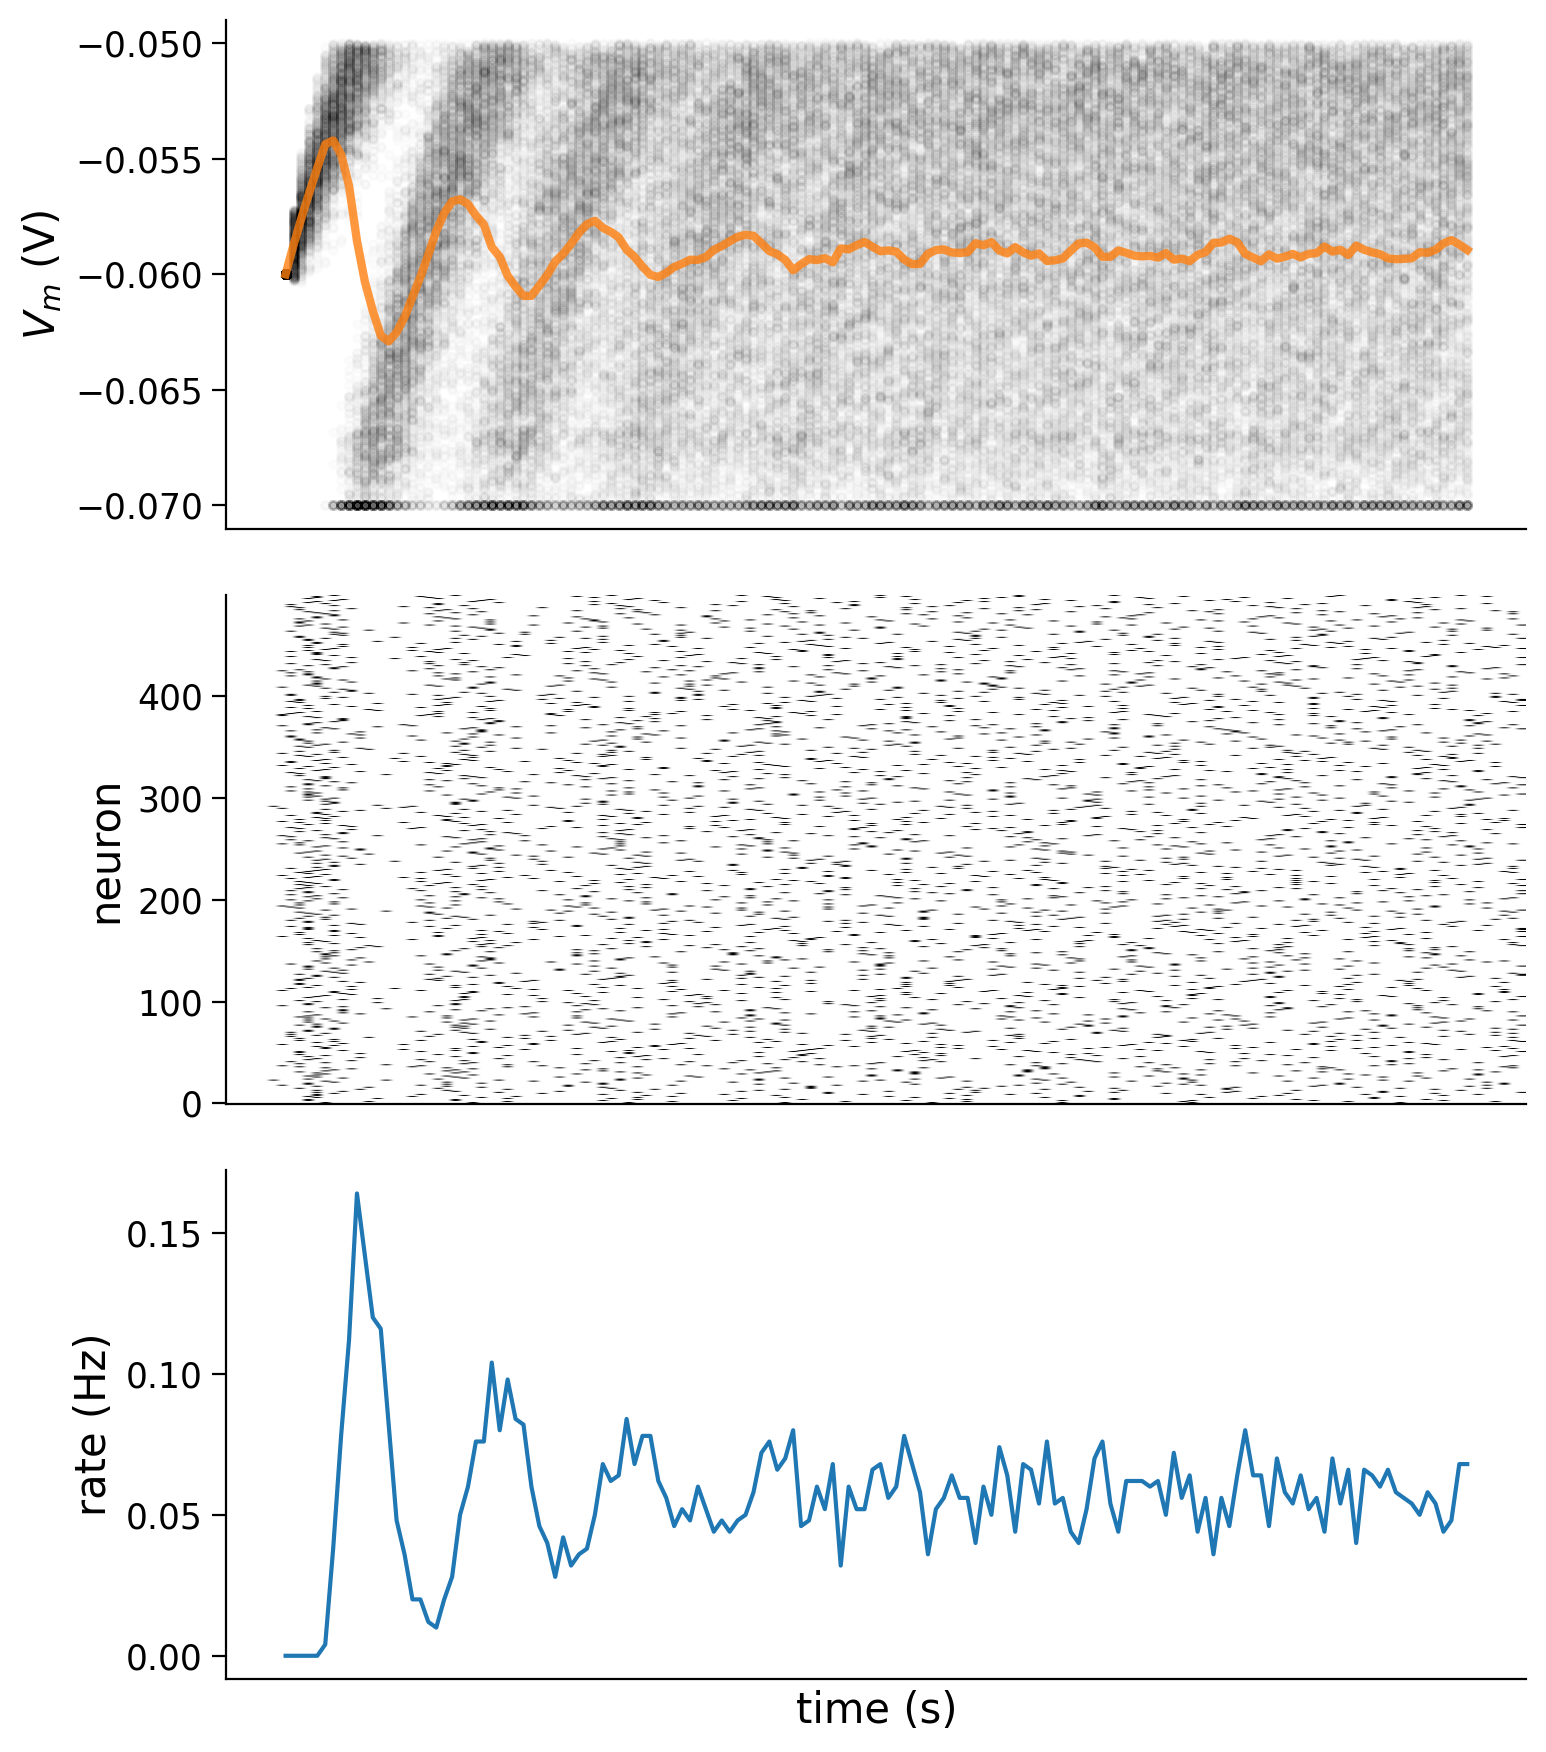

In [38]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize spikes and spikes_n
raster = np.zeros([n, step_end])
spikes_n = np.zeros([step_end])

#################################################
## add spikes to LIF neuron ##
#################################################

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  spiked = v_n[:, step] >= vth
  v_n[spiked, step] = vr
  raster[spiked, step] = 1


plot_all(t_range, v_n, raster)

### Refractory

#### Ex5 Refractory

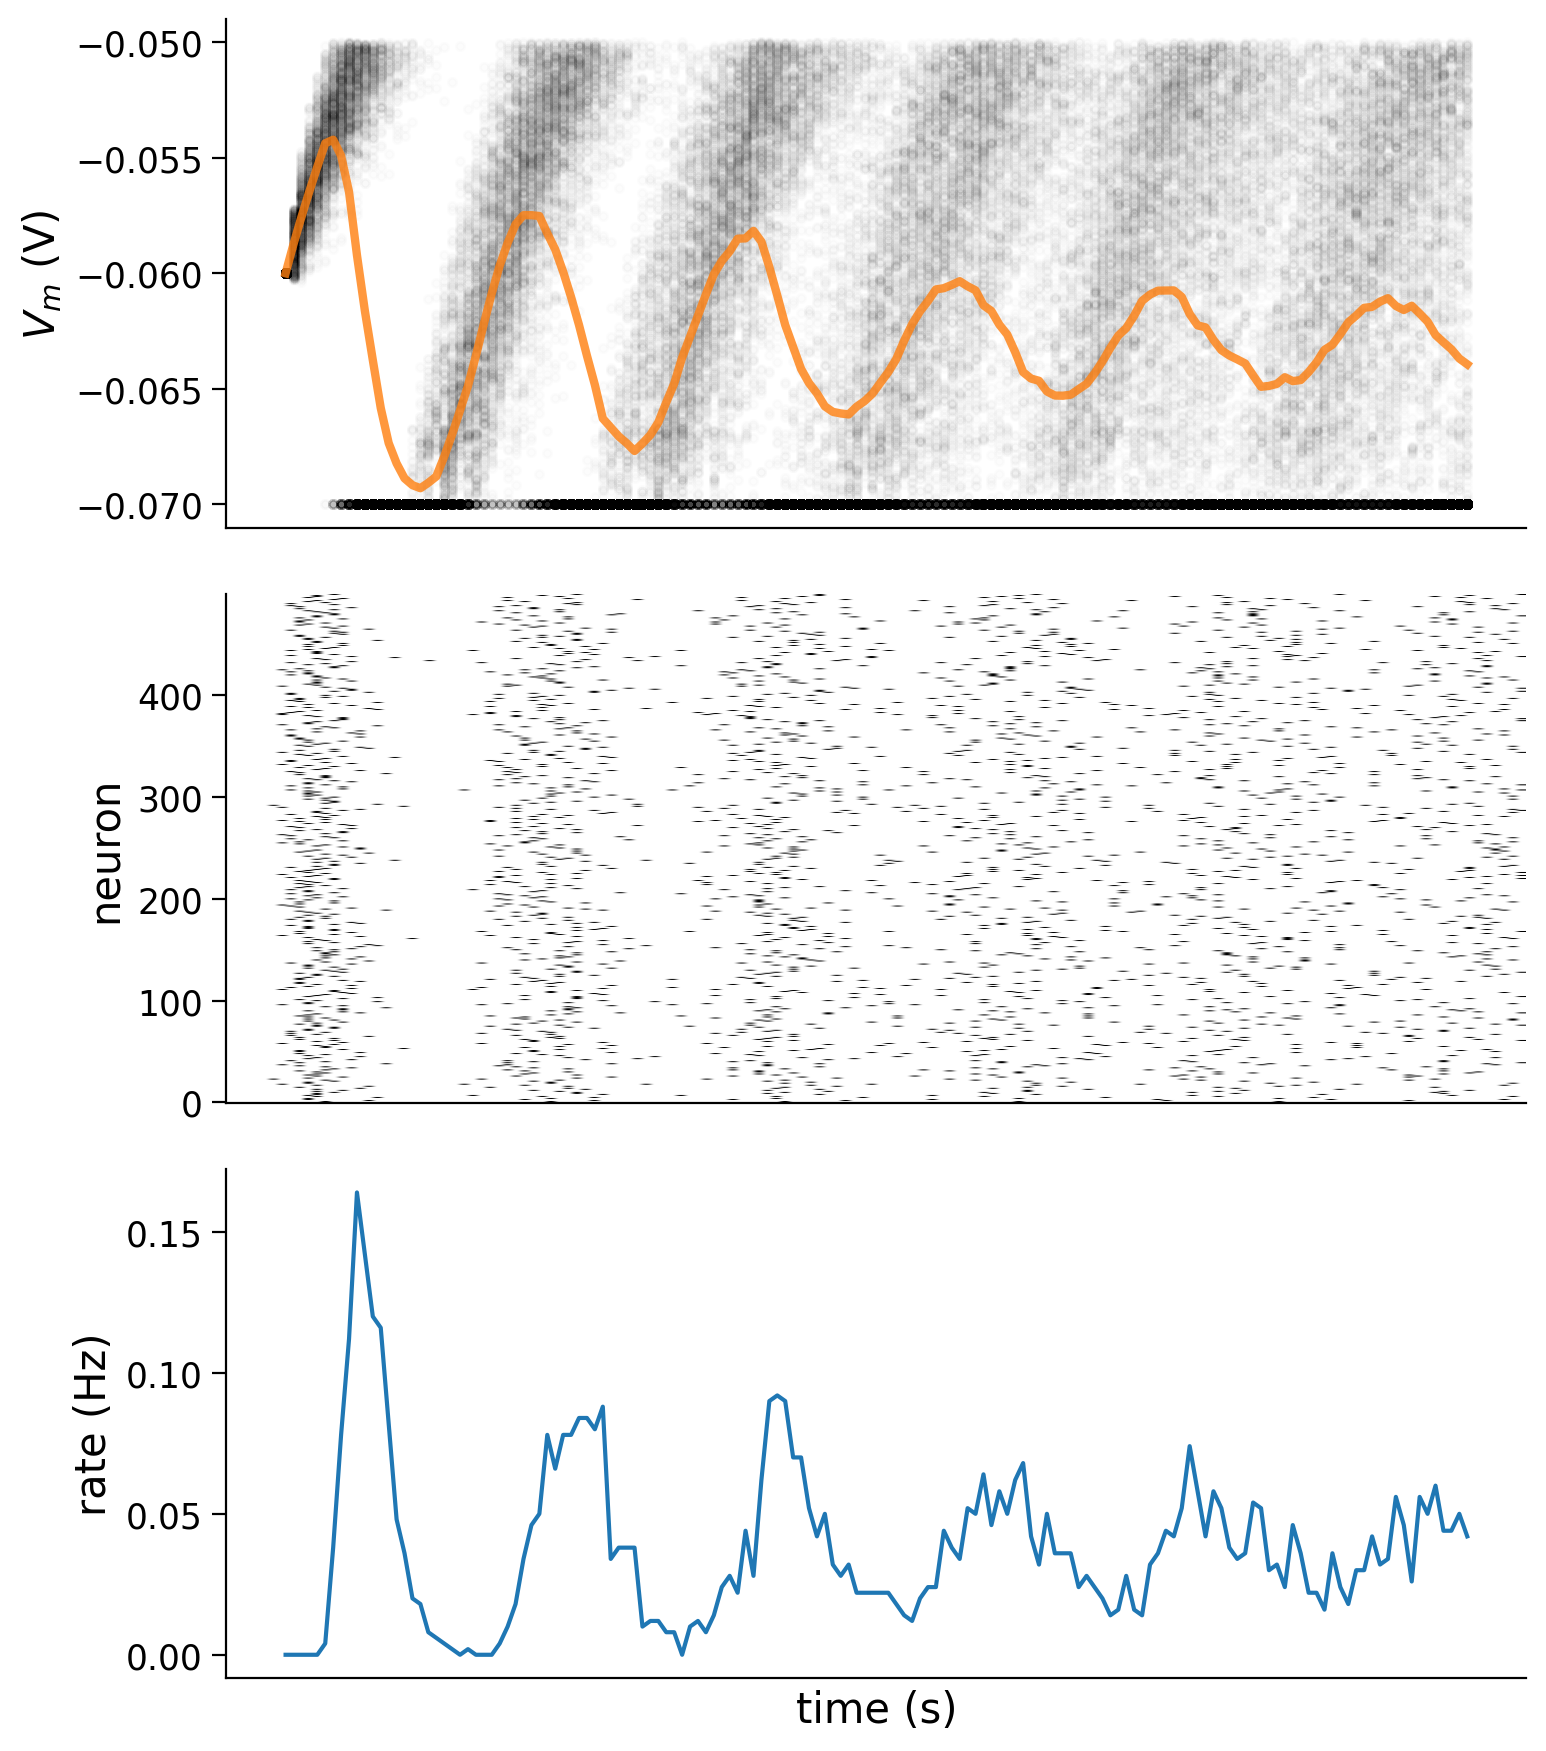

In [40]:
#################################################
## add refactory period ##
#################################################

# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize t_ref and last_spike
t_ref = 0.01
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step == 0:
    continue

  # Compute v_n
  v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r*i[:, step])

  # Initialize boolean numpy array `spiked` with v_n > v_thr
  spiked = (v_n[:,step] >= vth)

  # Set relevant values of v_n to v_reset using spiked
  v_n[spiked,step] = vr

  # Set relevant elements in raster to 1 using spiked
  raster[spiked,step] = 1.

  # Initialize boolean numpy array clamped using last_spike, t and t_ref
  clamped = (t - last_spike) < t_ref

  # Reset clamped neurons to vr using clamped
  v_n[clamped,step] = vr

  # Update numpy array last_spike with time t for spiking neurons
  last_spike[spiked] = t

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)

#### Interactive Demo

In [41]:
def random_ref_period(mu, sigma):
  # set random number generator
  np.random.seed(2020)

  # initialize step_end, t_range, n, v_n, syn and raster
  t_range = np.arange(0, t_max, dt)
  step_end = len(t_range)
  n = 500
  v_n = el * np.ones([n,step_end])
  syn = i_mean * (1 + 0.1*(t_max/dt)**(0.5)*(2*np.random.random([n,step_end])-1))
  raster = np.zeros([n,step_end])

  # initialize t_ref and last_spike
  t_ref = mu + sigma*np.random.normal(size=n)
  t_ref[t_ref<0] = 0
  last_spike = -t_ref * np.ones([n])

  # loop time steps
  for step, t in enumerate(t_range):
    if step==0:
      continue

    v_n[:,step] = v_n[:,step-1] + dt/tau * (el - v_n[:,step-1] + r*syn[:,step])

    # boolean array spiked indexes neurons with v>=vth
    spiked = (v_n[:,step] >= vth)
    v_n[spiked,step] = vr
    raster[spiked,step] = 1.

    # boolean array clamped indexes refractory neurons
    clamped = (last_spike + t_ref > t)
    v_n[clamped,step] = vr
    last_spike[spiked] = t

  # plot multiple realizations of Vm, spikes and mean spike rate
  plot_all(t_range, v_n, raster)

  # plot histogram of t_ref
  plt.figure(figsize=(8,4))
  plt.hist(t_ref, bins=32, histtype='stepfilled', linewidth=0, color='C1')
  plt.xlabel(r'$t_{ref}$ (s)')
  plt.ylabel('count')
  plt.tight_layout()

_ = widgets.interact(random_ref_period, mu = (0.01, 0.05, 0.01), \
                              sigma = (0.001, 0.02, 0.001))

interactive(children=(FloatSlider(value=0.02, description='mu', max=0.05, min=0.01, step=0.01), FloatSlider(va…

### Refactor

#### Ex6 Refactor

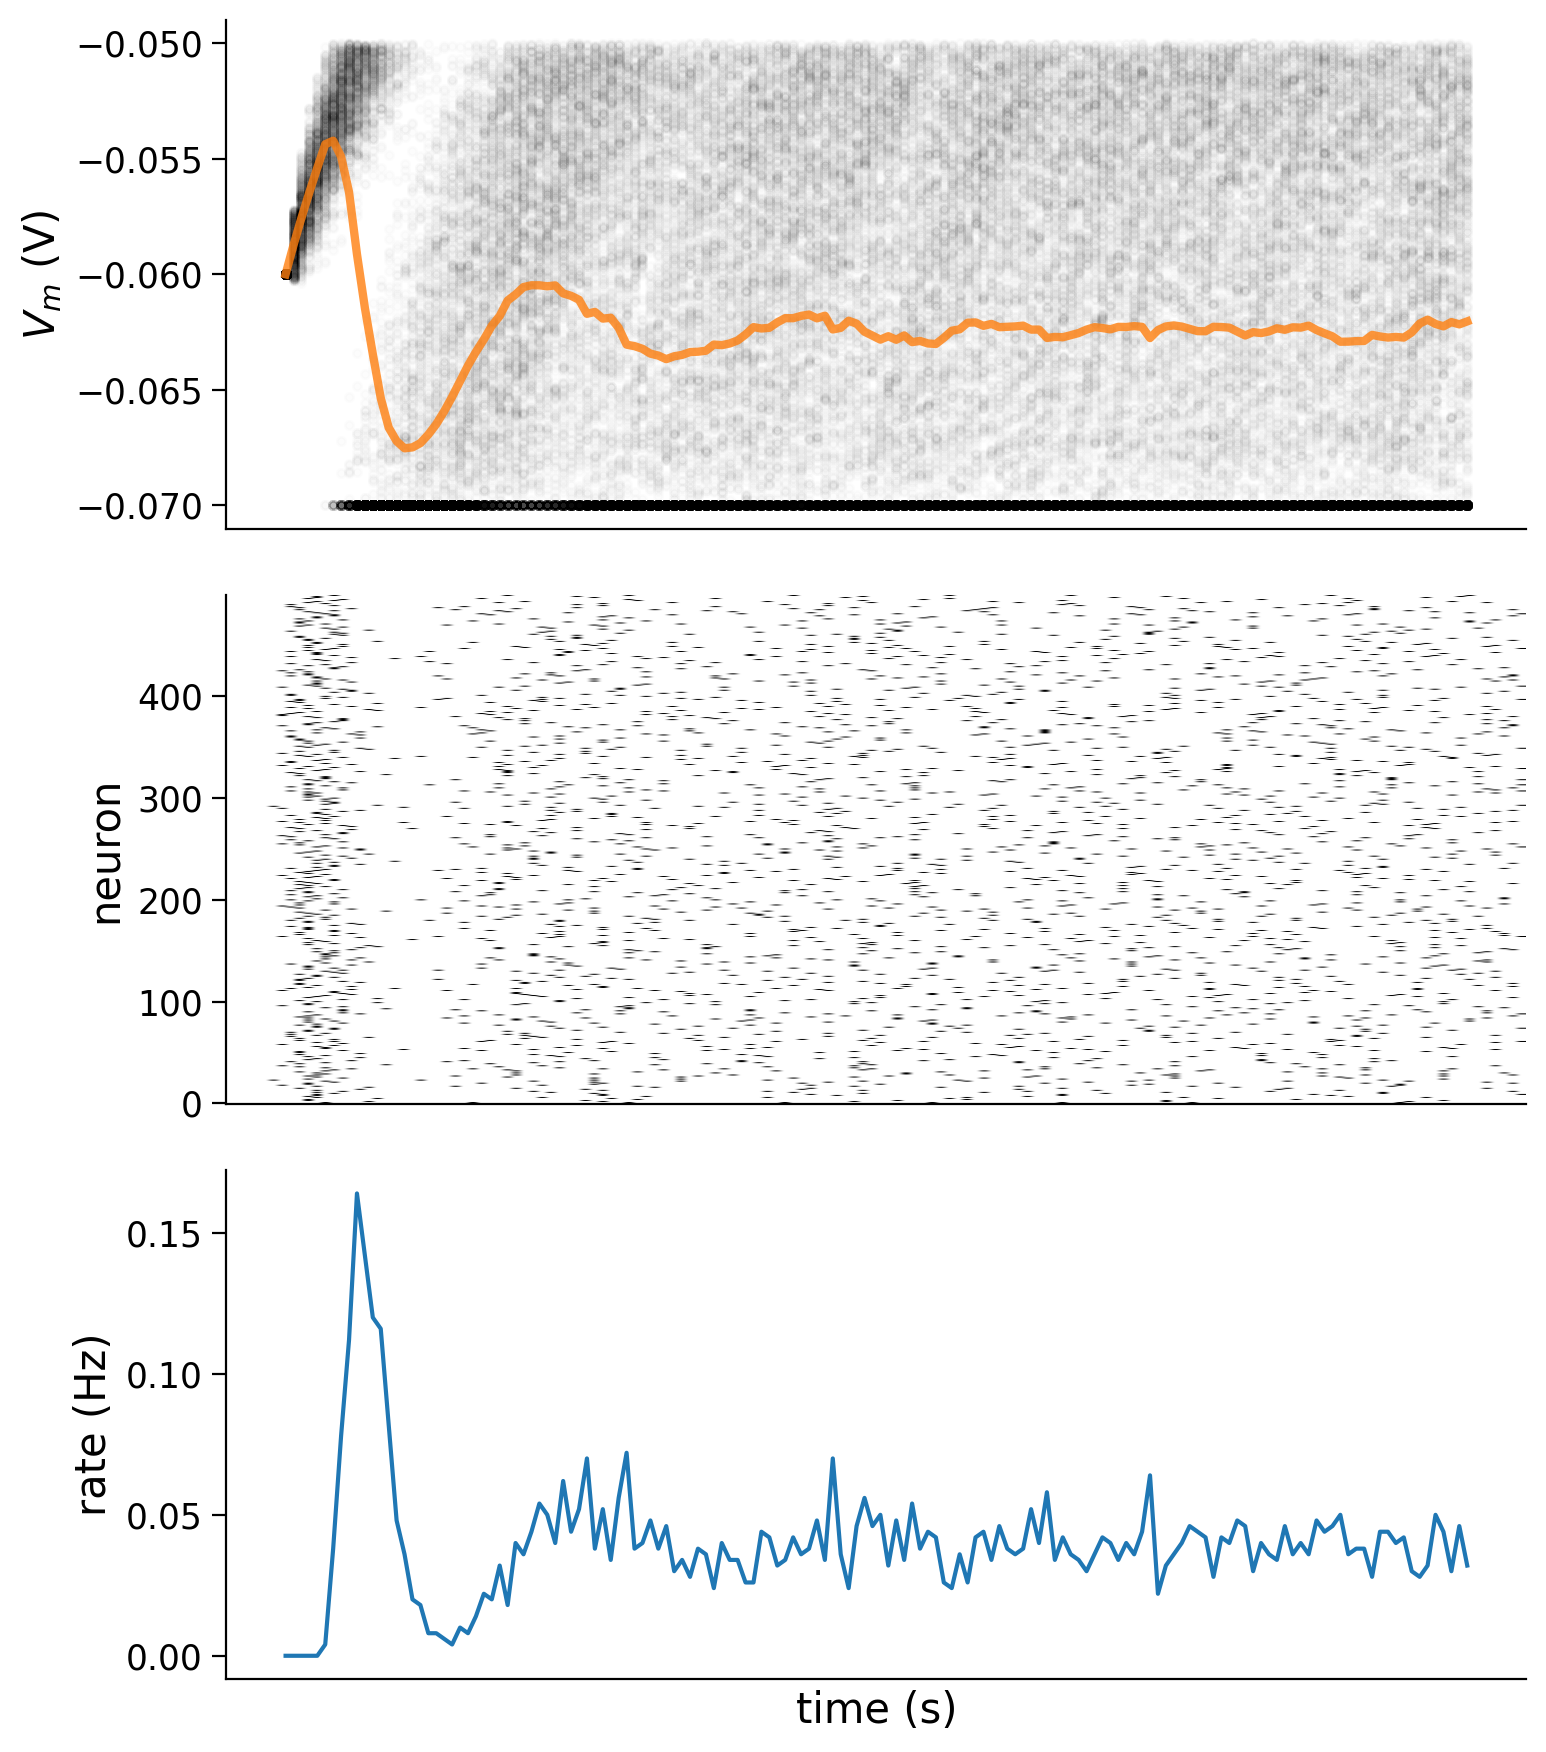

In [42]:
def ode_step(v, i, dt):
  """
  Evolves membrane potential by one step of discrete time integration

  Args:
    v (numpy array of floats)
      membrane potential at previous time step of shape (neurons)

    i (numpy array of floats)
      synaptic input at current time step of shape (neurons)

    dt (float)
      time step increment

  Returns:
    v (numpy array of floats)
      membrane potential at current time step of shape (neurons)
  """
  v = v + dt/tau * (el - v + r*i)

  return v


def spike_clamp(v, delta_spike):
  """
  Resets membrane potential of neurons if v>= vth
  and clamps to vr if interval of time since last spike < t_ref

  Args:
    v (numpy array of floats)
      membrane potential of shape (neurons)

    delta_spike (numpy array of floats)
      interval of time since last spike of shape (neurons)

  Returns:
    v (numpy array of floats)
      membrane potential of shape (neurons)
    spiked (numpy array of floats)
      boolean array of neurons that spiked  of shape (neurons)
  """

  ####################################################
  ## complete spike_clamp ##
  ####################################################
  # Boolean array spiked indexes neurons with v>=vth
  spiked = (v >= vth)
  v[spiked] = vr

  # Boolean array clamped indexes refractory neurons
  clamped = (delta_spike < t_ref)
  v[clamped] = vr

  return v, spiked


# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize t_ref and last_spike
mu = 0.01
sigma = 0.007
t_ref = mu + sigma*np.random.normal(size=n)
t_ref[t_ref<0] = 0
last_spike = -t_ref * np.ones([n])

# Loop over time steps
for step, t in enumerate(t_range):

  # Skip first iteration
  if step==0:
    continue

  # Compute v_n
  v_n[:,step] = ode_step(v_n[:,step-1], i[:,step], dt)

  # Reset membrane potential and clamp
  v_n[:,step], spiked = spike_clamp(v_n[:,step], t - last_spike)

  # Update raster and last_spike
  raster[spiked,step] = 1.
  last_spike[spiked] = t

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)

#### Ex7 Class

Ran for 0.15s in 150 steps.


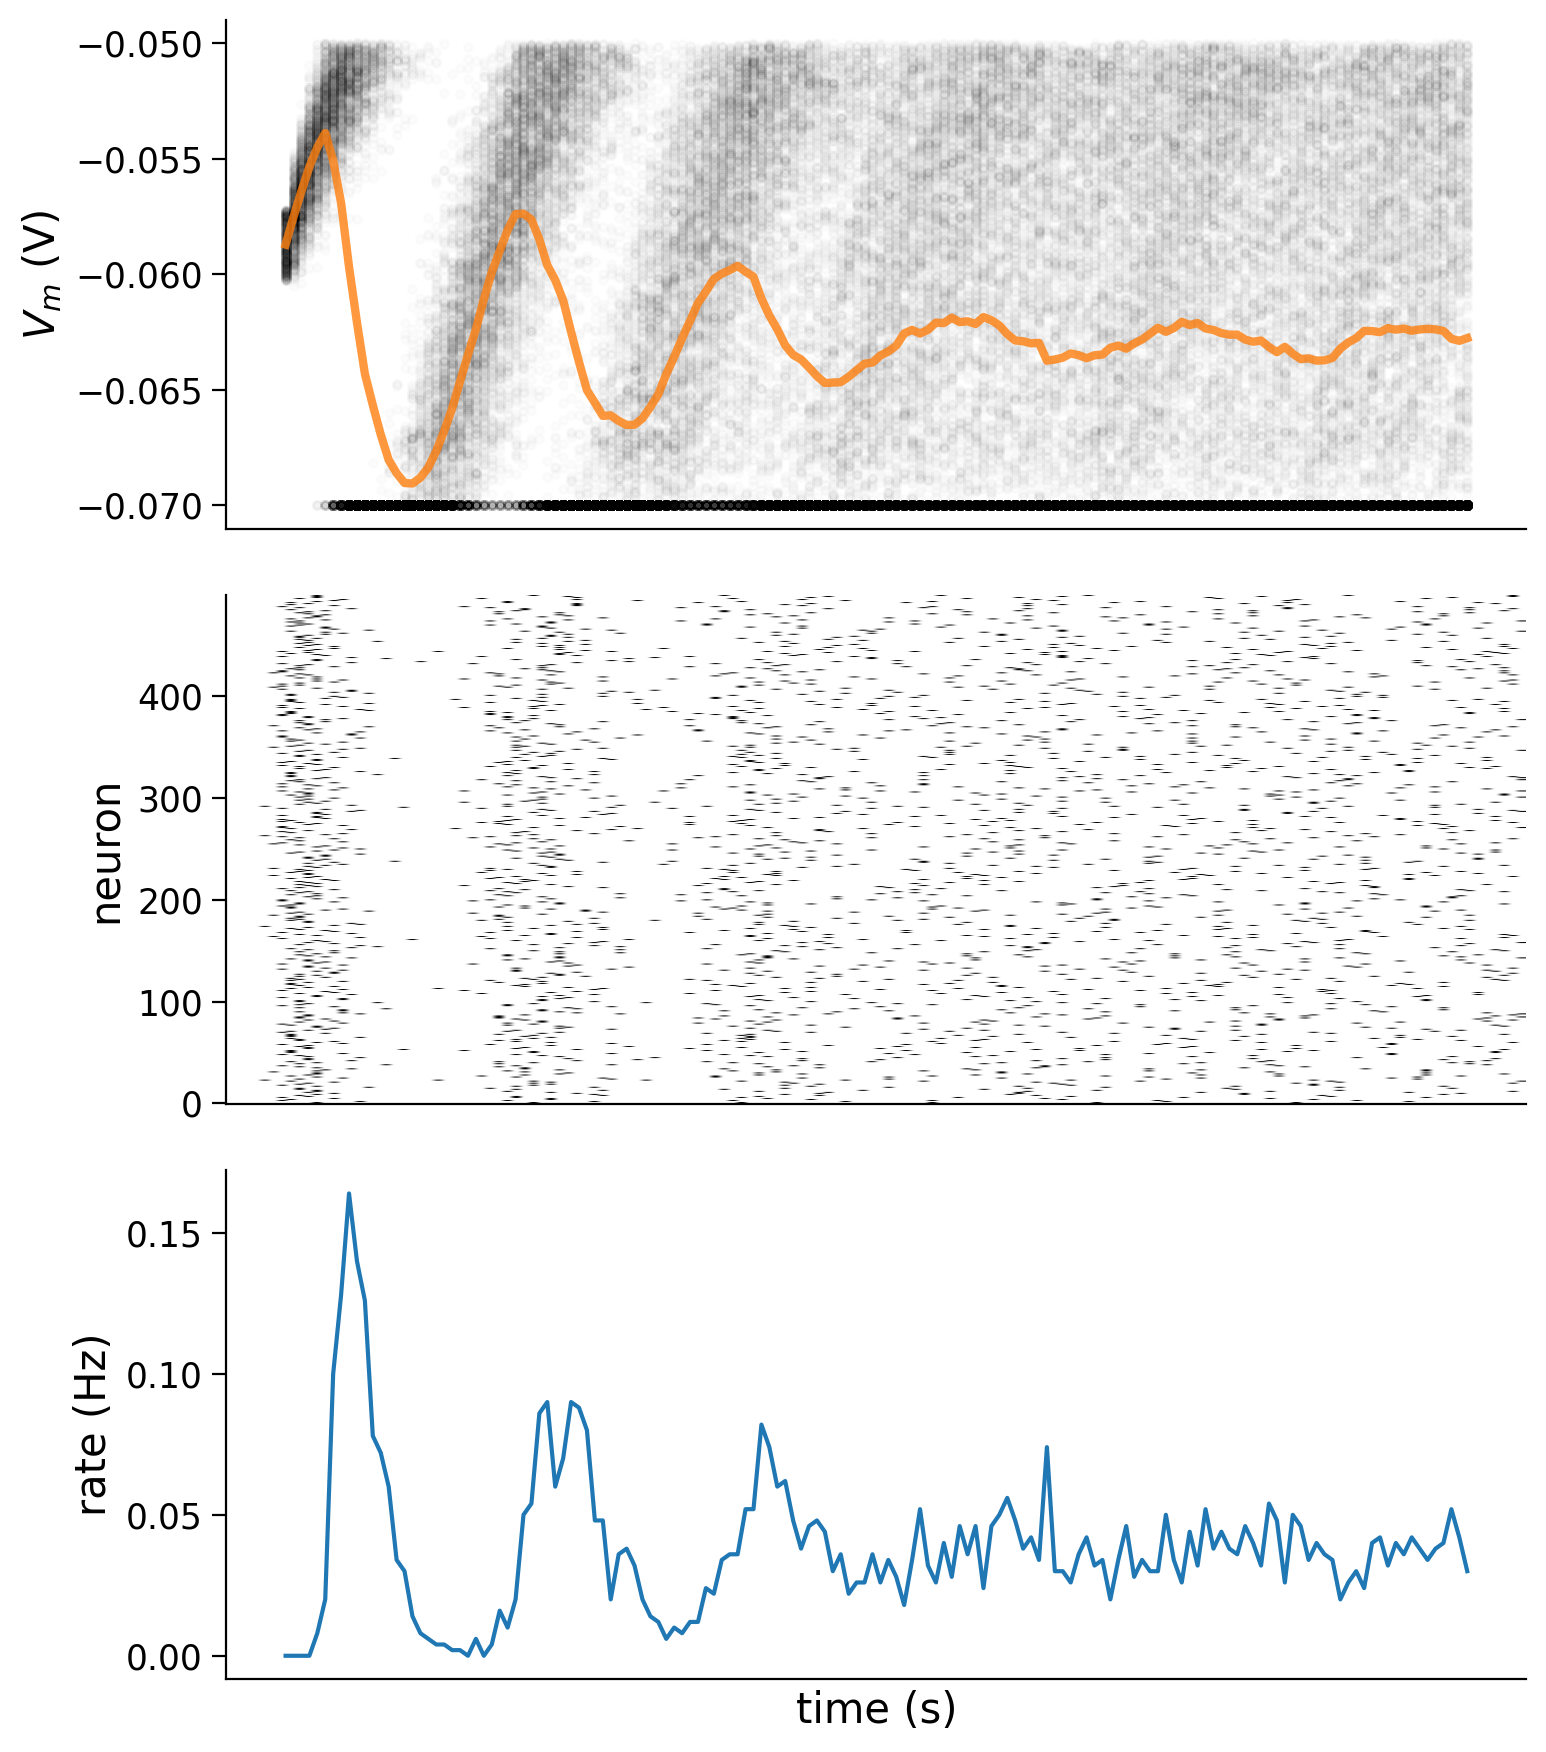

In [43]:
# Simulation class
class LIFNeurons:
  """
  Keeps track of membrane potential for multiple realizations of LIF neuron,
  and performs single step discrete time integration.
  """
  def __init__(self, n, t_ref_mu=0.01, t_ref_sigma=0.002,
               tau=20e-3, el=-60e-3, vr=-70e-3, vth=-50e-3, r=100e6):

    # Neuron count
    self.n = n

    # Neuron parameters
    self.tau = tau        # second
    self.el = el          # milivolt
    self.vr = vr          # milivolt
    self.vth = vth        # milivolt
    self.r = r            # ohm

    # Initializes refractory period distribution
    self.t_ref_mu = t_ref_mu
    self.t_ref_sigma = t_ref_sigma
    self.t_ref = self.t_ref_mu + self.t_ref_sigma * np.random.normal(size=self.n)
    self.t_ref[self.t_ref<0] = 0

    # State variables
    self.v = self.el * np.ones(self.n)
    self.spiked = self.v >= self.vth
    self.last_spike = -self.t_ref * np.ones([self.n])
    self.t = 0.
    self.steps = 0


  def ode_step(self, dt, i):

    # Update running time and steps
    self.t += dt
    self.steps += 1

    # One step of discrete time integration of dt
    self.v = self.v + dt / self.tau * (self.el - self.v + self.r * i)

    ####################################################
    ## complete the `ode_step` method ##
    ####################################################

    # Spike and clamp
    self.spiked = (self.v >= self.vth)
    self.v[self.spiked] = self.vr
    self.last_spike[self.spiked] = self.t
    clamped = (self.t - self.last_spike < self.t_ref)
    self.v[clamped] = self.vr


# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
plot_all(t_range, v_n, raster)